# Boosting Assignment

## Theoretical

#### 1) What is Boosting in Machine Learning ?

In machine learning, boosting is an ensemble method that combines multiple "weak learners" (models that perform only slightly better than random guessing) to create a strong predictive model by iteratively focusing on correcting errors from previous iterations.

#### 2)  How does Boosting differ from Bagging ?

Bagging (Bootstrap Aggregating) trains models in parallel on different subsets of the data, averaging their predictions to reduce variance, while Boosting trains models sequentially, with each model focusing on the errors of the previous ones to reduce bias and improve accuracy.

#### 3) What is the key idea behind AdaBoost ?

The key idea behind AdaBoost is to combine multiple weak learners (like decision stumps) to create a strong learner by iteratively adjusting the weights of the training data, focusing on instances that were previously misclassified. This allows AdaBoost to adaptively learn from its mistakes and improve its accuracy over time.

#### 4) Explain the working of AdaBoost with an example.

AdaBoost is an ensemble learning algorithm that improves accuracy by combining the predictions of multiple weak classifiers. It works iteratively, training weak learners on weighted data and focusing on misclassified instances. Misclassified instances get higher weights in subsequent iterations, making them more important for the next weak learner to learn from.

#### 5) What is Gradient Boosting, and how is it different from AdaBoost ?

Gradient Boosting and AdaBoost are both ensemble learning methods, but they differ in how they weight and combine weak learners. Gradient Boosting uses a more general approach, focusing on minimizing a loss function through gradient descent, while AdaBoost focuses on re-weighting misclassified data points in each iteration.

#### 6) What is the loss function in Gradient Boosting ?

In gradient boosting, the loss function quantifies the difference between model predictions and actual values, guiding the algorithm to minimize errors iteratively. For regression tasks, common loss functions include mean squared error (MSE), while for classification, logarithmic loss (or cross-entropy) is often used.

#### 7) How does XGBoost improve over traditional Gradient Boosting ?

Parallel processing: XGBoost leverages the power of parallel processing, making it significantly faster than methods such as GBM. It utilizes multiple CPU cores during model execution. The parallelized aspects of XGBoost include tree building and boosting rounds.

#### 8) What is the difference between XGBoost and CatBoost ?

XGBoost and CatBoost are both powerful gradient boosting algorithms, but they differ significantly in their approach to handling categorical data and their default settings. XGBoost requires pre-processing of categorical features, while CatBoost handles them natively, making it simpler to use for data with many categorical features.

#### 9) What are some real-world applications of Boosting techniques ?

Boosting techniques find applications in diverse fields like finance, e-commerce, healthcare, and more. They are used for tasks such as credit scoring, fraud detection, personalized recommendations, disease diagnosis, and time series forecasting. Essentially, boosting algorithms enhance the accuracy of predictive models by sequentially training weak learners and focusing on correcting previous errors.

#### 10) How does regularization help in XGBoost ?

Regularization in XGBoost helps prevent overfitting and improves the model's ability to generalize to new, unseen data by penalizing complex models. It encourages simpler models with smaller weights, making them less sensitive to training data noise. This is achieved through L1 (Lasso) and L2 (Ridge) regularization terms added to the objective function.

#### 11) What are some hyperparameters to tune in Gradient Boosting models ?

In Gradient Boosting models, key hyperparameters to tune include the number of estimators (trees), learning rate, maximum depth of trees, and the regularization strength. The learning rate controls the contribution of each tree, while the number of estimators dictates the total number of trees in the ensemble. Additionally, features can be sampled (subsample) and regularization can be applied to prevent overfitting.

#### 12) What is the concept of Feature Importance in Boosting ?

In boosting algorithms, feature importance refers to the method of determining which input features are most influential in a model's predictions. This is achieved by assigning a score to each feature, indicating its contribution to the model's accuracy. Higher scores signify greater influence on the model's outcome.

#### 13) Why is CatBoost efficient for categorical data ?

CatBoost is efficient for categorical data because it handles categorical features directly, reducing the need for pre-processing and potential information loss associated with traditional encoding methods like one-hot encoding. It converts categorical values into numerical representations using "target statistics", which considers the target variable during ordering, minimizing overfitting and improving accuracy.

## Practical

#### 14) Train an AdaBoost Classifier on a sample dataset and print model accuracy.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.85


#### 15) Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost Regressor
regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 16.260789481686942


#### 16) Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Print feature importances
feature_importances = gbc.feature_importances_
for i, importance in enumerate(feature_importances):
  print(f"Feature {data.feature_names[i]}: {importance}")

Feature mean radius: 1.292348076813499e-05
Feature mean texture: 0.027804583634348873
Feature mean perimeter: 0.00020118364232095282
Feature mean area: 0.0004254033042015456
Feature mean smoothness: 0.0024666044618570173
Feature mean compactness: 0.0029960469868226245
Feature mean concavity: 0.0009222332874449441
Feature mean concave points: 0.4505275876506107
Feature mean symmetry: 0.0005199404606719796
Feature mean fractal dimension: 0.00010669160100635732
Feature radius error: 0.006870207891017868
Feature texture error: 0.003604013810768886
Feature perimeter error: 0.001156802373414802
Feature area error: 0.008415272506866505
Feature smoothness error: 0.0005564528920603285
Feature compactness error: 0.0025106349835955057
Feature concavity error: 0.013067922820320132
Feature concave points error: 0.0020381084784025583
Feature symmetry error: 0.0007028625799243465
Feature fractal dimension error: 0.004223933303430293
Feature worst radius: 0.075588875185215
Feature worst texture: 0.039

#### 17)  Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.9782723326633272


#### 18) Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.

In [5]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_clf.predict(X_test)

# Evaluate the XGBoost model's accuracy
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Model Accuracy: {xgb_accuracy}")

# Initialize and train a Gradient Boosting Classifier (from previous code)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)

# Make predictions on the test set
gbc_y_pred = gbc.predict(X_test)

# Evaluate the Gradient Boosting model's accuracy
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
print(f"Gradient Boosting Model Accuracy: {gbc_accuracy}")

# Compare accuracies
print(f"Difference in accuracy: {xgb_accuracy - gbc_accuracy}")

XGBoost Model Accuracy: 0.956140350877193
Gradient Boosting Model Accuracy: 0.956140350877193
Difference in accuracy: 0.0


#### 19) Train a CatBoost Classifier and evaluate using F1-Score.

In [1]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0, random_seed=42)
cat_clf.fit(X_train, y_train)

# Make predictions on the test set
cat_y_pred = cat_clf.predict(X_test)

# Evaluate the CatBoost model using F1-score
f1 = f1_score(y_test, cat_y_pred)
print(f"CatBoost Model F1-score: {f1}")

CatBoost Model F1-score: 0.9722222222222222


#### 20) Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).

In [3]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Sample data
data = {'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'target': np.random.rand(100)}
df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df[['feature1', 'feature2']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Specify objective
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.10700928947421454


#### 21) Train an AdaBoost Classifier and visualize feature importance.

Accuracy: 0.91


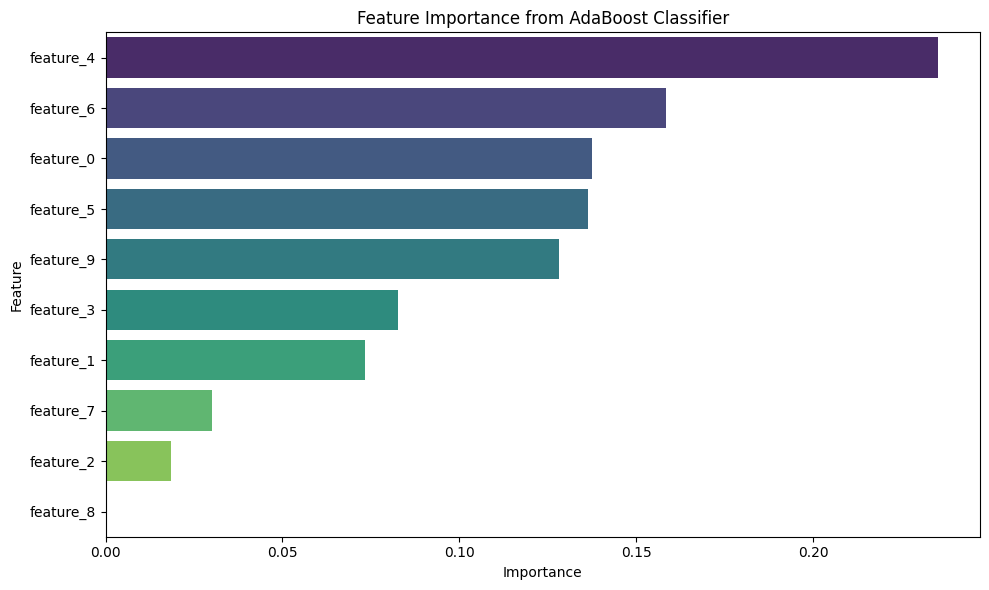

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1: Create synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Optional: Convert to DataFrame for better column naming
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 5: Visualize feature importance
importances = clf.feature_importances_

# Create a DataFrame for plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance from AdaBoost Classifier')
plt.tight_layout()
plt.show()

#### 22) Train a Gradient Boosting Regressor and plot learning curves.

Mean Squared Error: 1234.75


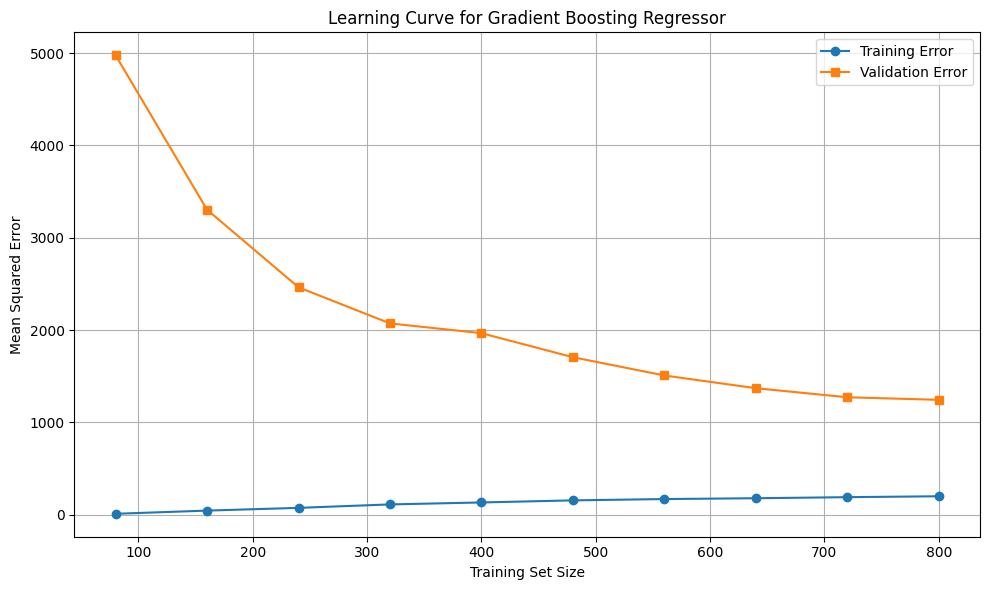

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Step 4: Evaluate on test data
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Step 5: Plot Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    estimator=gbr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert negative MSE to positive
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, val_errors, label='Validation Error', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 23) Train an XGBoost Classifier and visualize feature importance.

Accuracy: 0.93


<Figure size 1000x600 with 0 Axes>

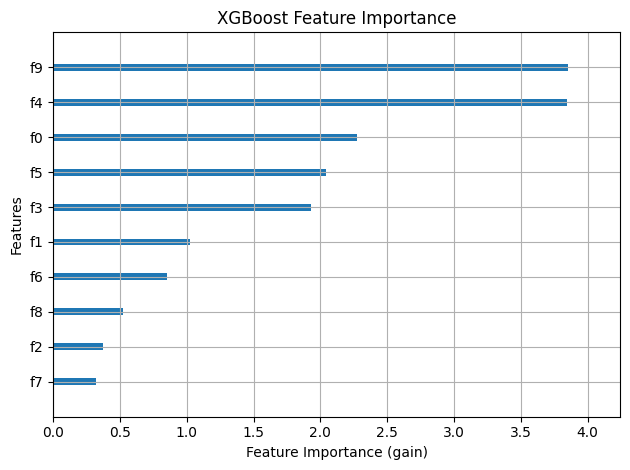

In [12]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import make_classification

# Step 1: Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 5: Visualize feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', xlabel='Feature Importance (gain)', show_values=False)
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 24) Train a CatBoost Classifier and plot the confusion matrix.

Accuracy: 0.90


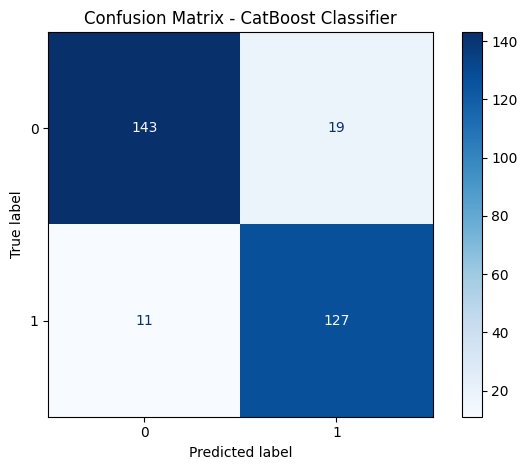

In [13]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.grid(False)
plt.tight_layout()
plt.show()

#### 25) Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

n_estimators = 10 --> Accuracy: 0.8567
n_estimators = 50 --> Accuracy: 0.9033
n_estimators = 100 --> Accuracy: 0.9133
n_estimators = 200 --> Accuracy: 0.9233
n_estimators = 300 --> Accuracy: 0.9133


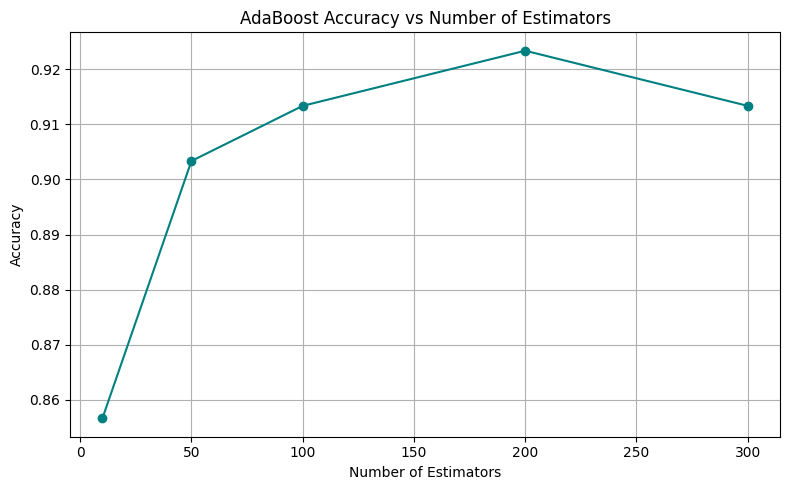

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost with different numbers of estimators
n_estimators_list = [10, 50, 100, 200, 300]
accuracies = []

for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n} --> Accuracy: {acc:.4f}")

# Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-', color='teal')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 26) Train a Gradient Boosting Classifier and visualize the ROC curve.

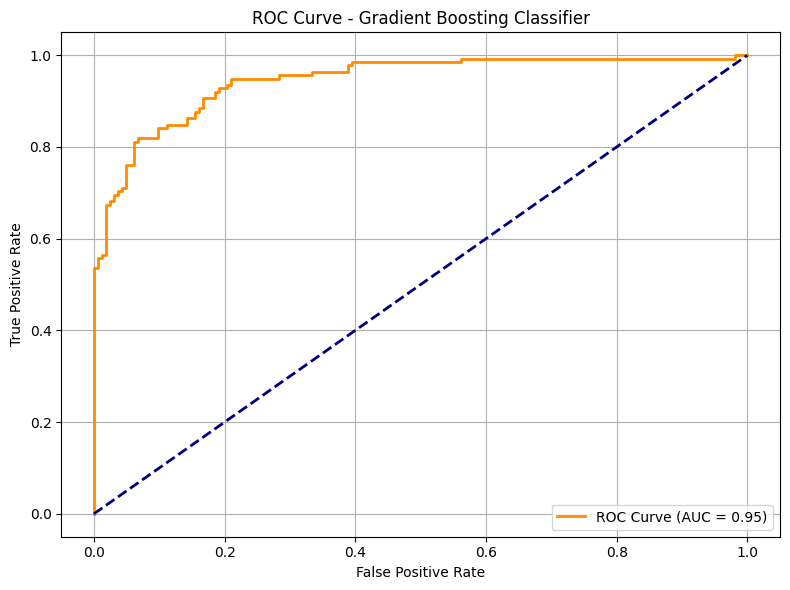

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#Create synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (no-skill classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 27) Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

Accuracy: 0.93


<Figure size 1000x600 with 0 Axes>

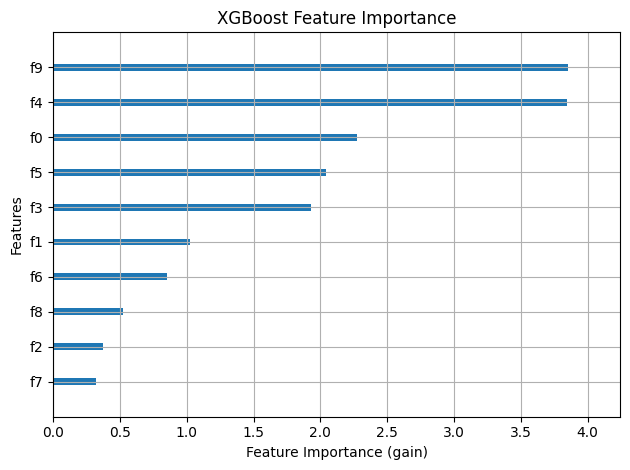

In [16]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import make_classification

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', xlabel='Feature Importance (gain)', show_values=False)
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 28)  Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

In [18]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Create imbalanced binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=10, weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    n_informative=5, n_redundant=2, random_state=42
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train CatBoostClassifier without class weights
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Train CatBoostClassifier with class weights
# Class 0 = majority, Class 1 = minority → give more weight to Class 1
model_with_weights = CatBoostClassifier(class_weights={0: 1, 1: 9}, verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

# Compare results
print("Without Class Weights:\n", classification_report(y_test, y_pred_no_weights))
print("With Class Weights:\n", classification_report(y_test, y_pred_with_weights))

Without Class Weights:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       269
           1       0.95      0.65      0.77        31

    accuracy                           0.96       300
   macro avg       0.96      0.82      0.87       300
weighted avg       0.96      0.96      0.96       300

With Class Weights:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       269
           1       0.84      0.68      0.75        31

    accuracy                           0.95       300
   macro avg       0.90      0.83      0.86       300
weighted avg       0.95      0.95      0.95       300



#### 29) Train an AdaBoost Classifier and analyze the effect of different learning rates.

Learning Rate = 0.01 --> Accuracy: 0.7300
Learning Rate = 0.05 --> Accuracy: 0.8500
Learning Rate = 0.10 --> Accuracy: 0.8467
Learning Rate = 0.50 --> Accuracy: 0.8933
Learning Rate = 1.00 --> Accuracy: 0.9133


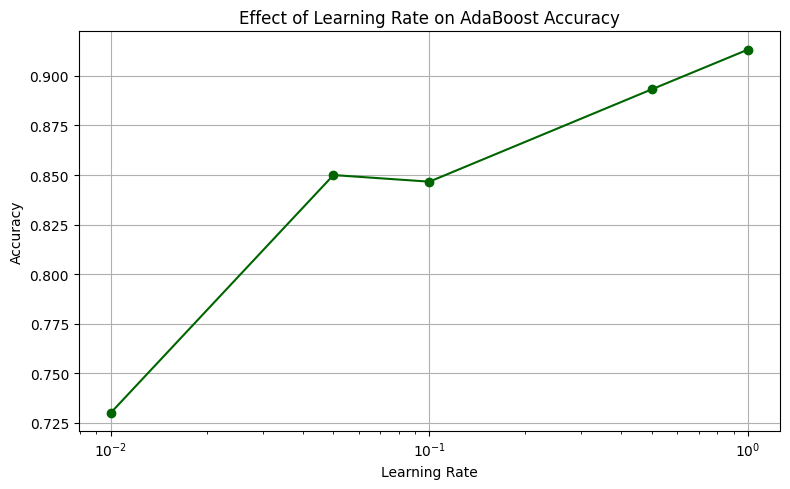

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Create synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate = {lr:.2f} --> Accuracy: {acc:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='darkgreen')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xscale("log") 
plt.grid(True)
plt.tight_layout()
plt.show()

#### 30) Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [21]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss, classification_report

# Create synthetic multi-class dataset
X, y = make_classification(n_samples=1500, n_features=10, n_informative=6,
                           n_redundant=2, n_classes=3, n_clusters_per_class=1,
                           random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Set up XGBoost Classifier for multi-class
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss',
                          n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict class probabilities for log-loss
y_probs = model.predict_proba(X_test)
loss = log_loss(y_test, y_probs)
print(f"Multi-class Log Loss: {loss:.4f}")

# classification metrics
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Multi-class Log Loss: 0.1457

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       151
           1       0.95      0.99      0.97       149
           2       0.92      0.95      0.94       150

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

